In [1]:
import numpy as np
import pandas as pd 
import time

from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from catboost import CatBoostRegressor

In [2]:
%matplotlib inline

In [3]:
def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y

    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())


train = pd.read_csv("../data/train-290118.csv")
test = pd.read_csv("../data/test_290118.csv")
test_id=test.id

sub = pd.DataFrame()
sub['id'] = test_id

In [4]:
feature_fe =['avg_IP',
             'avg_rd_max',
             'avg_LUMO',
             'avg_electronegativity',
             'avg_rp_max',
             'percent_atom_in',
             'percent_atom_al',
             'percent_atom_ga',
             'dist_23',
             'dist_25',
             'dist_16',
             'dist_46',
             'dist_15',
             'dist_40',
             'dist_33',
             'dist_29',
             'dist_18',
             'dist_8',
             'dist_77',
             'dist_65',
             'dist_47',
             'dist_20',
             'dist_30',
             'dist_49',
             'path_30',
             'path_20',
             'path_10',
             'path_0',
             'path_40',
             'path_49',
             'angle_179',
             'angle_86',
             'angle_169',
             'angle_171',
             'angle_95',
             'angle_93',
             'angle_121',
             'angle_89',
             'angle_108',
             'angle_91',
             'angle_165',
             'dihedral_75',
             'dihedral_154',
             'dihedral_66',
             'dihedral_7',
             'dihedral_178',
             'dihedral_97',
             'dihedral_85',
             'dihedral_131',
             'dihedral_24',
             'dihedral_91',
             'dihedral_135',
             'dihedral_79',
             'dihedral_177',
             'dihedral_119',
             'dihedral_2',
             'A_8',
             'A_5',
             'A_3',
             'A_2',
             'A_0',
             'A_7',
             'A_6',
             'A_1',
             'A_4',
             'B_8',
             'B_6',
             'B_5',
             'B_2',
             'B_3',
             'B_1',
             'B_0',
             'B_7',
             'B_4',
             'R_1',
             'R_2',
             'R_0',
             'r_2',
             'r_1',
             'r_0',
             'lattice_angle_sum_discrete_215',
             'lattice_angle_sum_discrete_270',
             'lattice_angle_sum_discrete_285',
             'lattice_angle_sum_discrete_300',
             'clusters_0',
             'clusters_1',
             'clusters_2',
             'clusters_3',
             'clusters_4',
             'clusters_5',
             'clusters_6',
             'clusters_7',
             'clusters_8',
             'clusters_9',
             'clusters_10']

In [6]:
feature_be = ['avg_HOMO',
             'avg_mass',
             'avg_IP',
             'percent_atom_in',
             'percent_atom_al',
             'percent_atom_ga',
             'dist_16',
             'dist_17',
             'dist_21',
             'dist_11',
             'dist_15',
             'dist_18',
             'dist_42',
             'dist_19',
             'dist_8',
             'dist_9',
             'path_20',
             'path_40',
             'path_0',
             'path_49',
             'path_30',
             'path_10',
             'angle_84',
             'angle_95',
             'angle_123',
             'angle_118',
             'angle_102',
             'angle_78',
             'angle_126',
             'angle_97',
             'angle_94',
             'angle_86',
             'angle_101',
             'angle_169',
             'dihedral_39',
             'dihedral_130',
             'dihedral_48',
             'dihedral_118',
             'dihedral_89',
             'dihedral_49',
             'dihedral_129',
             'dihedral_76',
             'dihedral_40',
             'dihedral_79',
             'dihedral_29',
             'dihedral_99',
             'dihedral_134',
             'dihedral_2',
             'dihedral_132',
             'dihedral_135',
             'dihedral_20',
             'dihedral_114',
             'dihedral_74',
             'dihedral_107',
             'A_8',
             'A_0',
             'A_2',
             'A_4',
             'A_1',
             'A_5',
             'A_7',
             'B_0',
             'B_8',
             'B_4',
             'B_2',
             'B_1',
             'B_3',
             'R_2',
             'R_1',
             'R_0',
             'r_2',
             'r_0',
             'r_1',
             'number_of_total_atoms_30.0',
             'number_of_total_atoms_40.0',
             'number_of_total_atoms_80.0',
             'number_of_total_atoms_60.0',
             'spacegroup_167',
             'spacegroup_227',
             'spacegroup_194',
             'spacegroup_12',
             'lattice_angle_sum_discrete_215',
             'lattice_angle_sum_discrete_270',
             'lattice_angle_sum_discrete_285',
             'clusters_0',
             'clusters_1',
             'clusters_2',
             'clusters_3',
             'clusters_4',
             'clusters_5',
             'clusters_6',
             'clusters_7',
             'clusters_8',
             'clusters_9',
             'clusters_10']

In [7]:
def feCatBoost(x_train, y_train,x_test, y_test,test,depth):
    model=CatBoostRegressor(iterations=2400,
                            learning_rate=0.01,
                            depth=depth,
                            loss_function='RMSE',
                            eval_metric='RMSE',
                            random_seed=99,
                            l2_leaf_reg=4,
                            od_type='Iter',
                            task_type='CPU',
                            od_wait=50)
    model.fit(x_train, y_train, eval_set=(x_test, y_test), use_best_model=True, logging_level='Silent')
    y_pred_train=model.predict(x_test)
    rmsle_result = rmsle(y_pred_train,y_test)
    y_pred_test=model.predict(test)
    return y_pred_train,rmsle_result,y_pred_test

In [8]:
def beCatBoost(x_train, y_train,x_test, y_test,test,depth):
    model=CatBoostRegressor(iterations=2500,
                            learning_rate=0.01125,#0.01
                            depth=depth,#5
                            loss_function='RMSE',
                            eval_metric='RMSE',
                            random_seed=99,
                            l2_leaf_reg=14,
                            od_type='Iter',
                            task_type='CPU',
                            od_wait=50)
    model.fit(x_train, y_train, eval_set=(x_test, y_test), use_best_model=True, logging_level='Silent')
    y_pred_train=model.predict(x_test)
    rmsle_result = rmsle(y_pred_train,y_test)
    y_pred_test=model.predict(test)
    return y_pred_train,rmsle_result,y_pred_test

In [9]:
X = train[feature_fe]
Xp = test[feature_fe]
Y_fe = np.log(train['formation_energy_ev_natom']+1)

sub['formation_energy_ev_natom'] = np.zeros_like(test_id)
kf = model_selection.KFold(n_splits=4, shuffle=True, random_state=30)#.ShuffleSplit(n_splits=10, test_size=.1)#KFold(n_splits=10, shuffle=True, random_state=30)
for dev_index, val_index in kf.split(X):
    t = time.time()
    dev_X, val_X = X.loc[dev_index], X.loc[val_index]
    dev_y, val_y = Y_fe.loc[dev_index], Y_fe.loc[val_index]
    y_pred_feen,rmsle_feen,y_pred_test_feen=feCatBoost(dev_X, dev_y, val_X, val_y,Xp,depth=8)
    sub['formation_energy_ev_natom'] += ((np.exp(y_pred_test_feen)-1)/4)
    print('this took {0:.02f}-seconds with a validation rmsle of {1:0.5f}'.format(time.time()-t, rmsle_feen))

this took 23.99-seconds with a validation rmsle of 0.02650
this took 23.40-seconds with a validation rmsle of 0.02393
this took 25.88-seconds with a validation rmsle of 0.02436
this took 27.25-seconds with a validation rmsle of 0.02625


In [10]:
X = train[feature_be]
Xp = test[feature_be]
Y_be = np.log(train['bandgap_energy_ev']+1)

sub['bandgap_energy_ev'] = np.zeros_like(test_id)
kf = model_selection.ShuffleSplit(n_splits=4, test_size=0.25, random_state=30)#.ShuffleSplit(n_splits=10, test_size=.1)#KFold(n_splits=10, shuffle=True, random_state=30)
for dev_index, val_index in kf.split(X):
    t = time.time()
    dev_X, val_X = X.loc[dev_index], X.loc[val_index]
    dev_y, val_y = Y_be.loc[dev_index], Y_be.loc[val_index]
    y_pred_feen,rmsle_feen,y_pred_test_been=beCatBoost(dev_X, dev_y, val_X, val_y,Xp,depth=5)
    sub['bandgap_energy_ev'] += ((np.exp(y_pred_test_been)-1)/4)
    print('this took {0:.02f}-seconds with a validation rmsle of {1:0.5f}'.format(time.time()-t, rmsle_feen))

this took 8.02-seconds with a validation rmsle of 0.04262
this took 7.88-seconds with a validation rmsle of 0.04323
this took 6.30-seconds with a validation rmsle of 0.05100
this took 6.55-seconds with a validation rmsle of 0.04043


In [14]:
sub.id = sub.id.astype('Int32')
sub.to_csv('../output/feb10_predictions_2004.csv', index=False)

In [15]:
sample_df = pd.read_csv('../output/sample.csv')

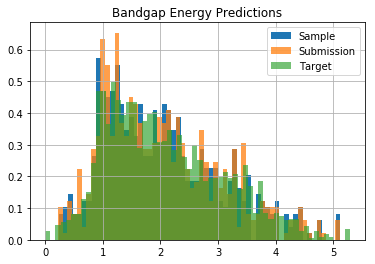

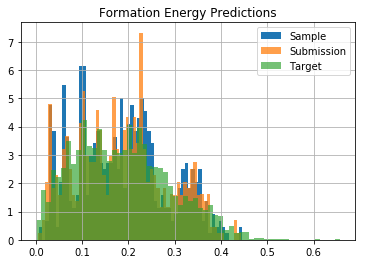

In [16]:
import matplotlib.pyplot as plt

sample_df.bandgap_energy_ev.hist(label='Sample', alpha=1,bins=60, normed=True)
sub.bandgap_energy_ev.hist(label='Submission', alpha=0.75,bins=60, normed=True)
train['bandgap_energy_ev'].hist(label='Target', alpha=0.65,bins=60, normed=True)
plt.title('Bandgap Energy Predictions')
plt.legend()
plt.show()

sample_df.formation_energy_ev_natom.hist(label='Sample', alpha=1,bins=60, normed=True)
sub['formation_energy_ev_natom'].hist(label='Submission', alpha=0.75,bins=60, normed=True)
train['formation_energy_ev_natom'].hist(label='Target', alpha=0.65,bins=60, normed=True)
plt.title('Formation Energy Predictions')
plt.legend()
plt.show()

